# 2. Clustering Analysis

In [1]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Choice of attributes

In [2]:
df_01_scaled = pd.read_csv('data/HR_comma_sep_01_scaled.csv', index_col=0)
# choice of attributes: K means works better with quantitative features.
# Euclidean distance is not meaningful for categorical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
train_data = np.array(df_01_scaled[numerical_features])

## Kmeans

### choice of best value of k

In [9]:
# choice of best value of  K that minimized the sum of squared error
sse_list = list([0] * 49)
silhouette_list = list([0] * 49)
max_k = 50
#plt.figure((12,6))

for k in range(2, max_k + 1):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse_list[k-2] = kmeans.inertia_
    silhouette_list[k-2] = silhouette_score(train_data, kmeans.labels_)
    

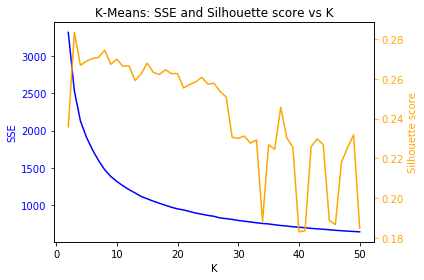

In [29]:
# plot SSE and silhouette on the same scale
# first axis
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k+1), sse_list, 'b')
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color='b')
ax1.tick_params('y', colors='b')
# second axis
ax2 = ax1.twinx()
ax2.plot(range(2, max_k+1), silhouette_list, 'orange')
ax2.set_ylabel('Silhouette score', color='orange')
ax2.tick_params('y', colors='orange')

plt.title('K-Means: SSE and Silhouette score vs K')
fig.tight_layout()
plt.savefig('images/sse_silhouette_vs_k.png')
plt.show()
# a way to chose the best k is to look at the 'elbow point' that is the point where the sse drops significantly.

In [66]:
print 'max silhouette:', np.max(silhouette_list), 'arg:', np.argmax(silhouette_list), 'k:', np.argmax(silhouette_list)+2
print 'min silhouette:', np.min(silhouette_list), 'arg:', np.argmin(silhouette_list), 'k:', np.argmin(silhouette_list)+2
print 'max sse:', np.max(sse_list), 'arg:', np.argmax(sse_list), 'k:', np.argmax(sse_list)+2
print 'min sse:', np.min(sse_list), 'arg:', np.argmin(sse_list), 'k:', np.argmin(sse_list)+2

diffs = [0] * len(sse_list)
max_sse = np.max(sse_list)
for i in range(1, len(sse_list)-2):
    diffs[i] = abs(sse_list[i] - sse_list[i-1])

print 'max sse diffs:', np.max(diffs), 'arg:', np.argmax(diffs), 'sse:', sse_list[np.argmax(diffs)], 'silhouette:', silhouette_list[np.argmax(diffs)]
print 'min sse diffs:', np.min(diffs), 'arg:', np.argmin(diffs), 'sse:', sse_list[np.argmin(diffs)], 'silhouette:', silhouette_list[np.argmin(diffs)]
print 'top 5 diffs args:', (-np.array(diffs)).argsort()[:5] # add +2 to get corresponding k
print 'top 5 silhouette args:', (-np.array(silhouette_list)).argsort()[:5]

chosen_k = 8

max silhouette: 0.283287077402 arg: 1 k: 3
min silhouette: 0.183148248315 arg: 38 k: 40
max sse: 3315.03302474 arg: 0 k: 2
min sse: 643.197741362 arg: 48 k: 50
max sse diffs: 781.887461355 arg: 1 sse: 2533.14556338 silhouette: 0.283287077402
min sse diffs: 0.0 arg: 0 sse: 3315.03302474 silhouette: 0.235879502474
top 5 diffs args: [1 2 3 4 5]
top 5 silhouette args: [1 6 5 4 8]


In [71]:
# analysis of the k centroids for a chosen k
kmeans = KMeans(n_clusters=chosen_k)
kmeans.fit(train_data)

1


In [73]:
# 2D PCA highlighting the clusters
pca = PCA(n_components=2)
X_scaled_2D = pca.fit_transform(train_data)

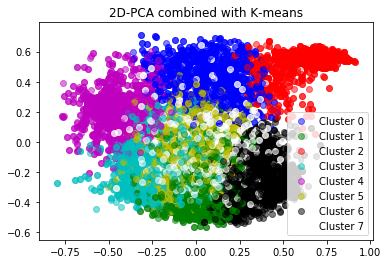

In [75]:
# plot PCA
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i in range(0, X_scaled_2D.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='b', alpha=0.5)
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='g', alpha=0.5)
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='r', alpha=0.5)
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='c', alpha=0.5)
    elif kmeans.labels_[i] == 4:
        c5 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='m', alpha=0.5)
    elif kmeans.labels_[i] == 5:
        c6 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='y', alpha=0.5)
    elif kmeans.labels_[i] == 6:
        c7 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='k', alpha=0.5)
    elif kmeans.labels_[i] == 7:
        c8 = plt.scatter(X_scaled_2D[i, 0], X_scaled_2D[i, 1], c='w', alpha=0.5)
plt.legend([c1, c2, c3, c4, c5, c6, c7, c8], ['Cluster %d' % i for i in range(0, 8)])
plt.title('2D-PCA combined with K-means')
plt.savefig('images/pca_kmeans.png')
plt.show()

# TODO plot centroids

## Analysis of k centroids

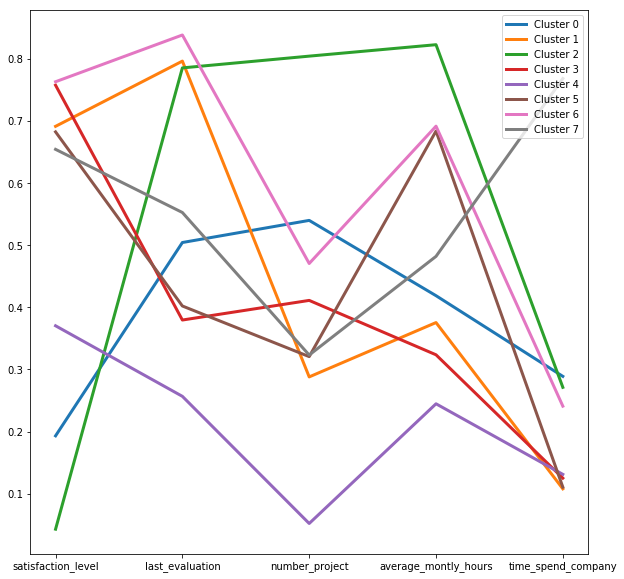

In [79]:
plt.figure(1, figsize=(10, 10))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(range(0, train_data.shape[1]), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, train_data.shape[1]), list(df_01_scaled.columns))
plt.legend()
plt.savefig('images/k-centroids_analysis')
plt.show()


### compare distributions of features within clusters (and the entire dataset)

In [82]:
df_cluster = pd.DataFrame(train_data, columns=numerical_features)
df_cluster['cluster'] = kmeans.labels_
for i in range(chosen_k):
    df_cluster[df['cluster'] == i].hist...

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,cluster
0,0.318681,0.265625,0.0,0.285047,0.125,4
1,0.780220,0.781250,0.6,0.775701,0.500,6
2,0.021978,0.812500,1.0,0.822430,0.250,2
3,0.692308,0.796875,0.6,0.593458,0.375,6
4,0.307692,0.250000,0.0,0.294393,0.125,4
